In [1]:
#multi_agent.ipynb
#
#by Joe Hahn
#jmh.datasciences@gmail.com
#12 February 2018
#
#This uses Q-learning on multiple agents to demonstrate something...

In [2]:
#game settings
N_agents = 10                #number of agents
N_buckets = 20               #number of buckets
max_turns = 400             #max number of moves in single game
turn = 0                     #starting turn
rn_seed = 14                 #seed for random number generator

In [3]:
#import game
from multi_agent import *
import time
time_start = time.time()

In [4]:
#import plotting libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5, font='DejaVu Sans')

In [5]:
#initialize system
environment = initialize_environment(rn_seed, max_turns, N_buckets, N_agents)
print 'environment = ', environment
state = initialize_state(environment, turn)
print 'state = ', state
reward = get_reward(state)
print 'reward = ', reward
state_vector = state2vector(state, environment)
print 'state_vector = ', state_vector
game_state = get_game_state(turn, environment)
print 'game_state = ', game_state

environment =  {'max_turns': 400, 'acts': ['move to 0', 'move to 1', 'move to 2', 'move to 3', 'move to 4', 'move to 5', 'move to 6', 'move to 7', 'move to 8', 'move to 9', 'move to 10', 'move to 11', 'move to 12', 'move to 13', 'move to 14', 'move to 15', 'move to 16', 'move to 17', 'move to 18', 'move to 19'], 'actions': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'N_agents': 10, 'rn_seed': 14, 'N_buckets': 20, 'bucket_params': [(-0.9150063436130123, -0.0, 1.9720866695473462, 0.1304687335805202, 5.791244677661562, 2.9581300043210192), (4.739912691214305, 0.0, 0.9964422732070588, 0.27807796954725283, 0.04561156299748628, 1.4946634098105882), (-0.15435254277035249, -0.0, 0.9203374191611748, 0.08572555635585871, 2.0855402106437637, 1.3805061287417622), (2.926989933180981, 0.0, 1.9139875488811362, 0.14702765236971554, 1.31155877793612, 2.870981323321704), (2.4377580171198243, 0.0, 1.2116592806086244, 0.07173640853774042, 5.737520437042611, 1.8174889209129366),

In [6]:
#illustrate moving an agent
action = N_buckets/2
state_next = move_agent(state, environment, action)
print 'action = ', action
print 'state_next = ', state_next
state_vector_next = state2vector(state_next, environment)
print 'state_vector_next = ', state_vector_next

action =  10
state_next =  {'bucket_rewards': [1.001159148440089, 5.9909653314416023, 1.0464437973386653, 5.1088585379708782, 2.6993915959614139, -1.390059635898075, 3.6871818447118878, 3.6789153425273589, 3.4388551564571963, 0.22659302502288345, 3.5609091676823423, 4.2111221538305257, 6.9772245207672361, 2.551613196146171, 4.3824755501370554, 5.9766914388984134, 4.3600215299420704, 5.9973359108545417, 1.248538195037654, 4.4554785785159154], 'agent_locations': [0, 1, 4, 5, 8, 12, 10, 14, 16, 18], 'previous_bucket_rewards': [0.052118947959131301, 5.2431191281657012, 0.8437518980526082, 6.1788734296888581, 2.7119330110044029, -0.24883639320244244, 4.4000466901984758, 0.77096336503003871, 3.8923688674416281, 0.71535956346514973, 3.0796829641360048, 5.237560411720267, 5.0910767672790307, 2.4415010270885031, 4.0108970987862183, 5.7474831940957944, 4.9359418568952602, 6.0125664278325122, 1.275556690976325, 4.0224755064951356], 'next_agent': 7}
state_vector_next =  [[ 1.          1.          

In [7]:
#play 1 game of randomly-moving agents and stash bucket rewards in dataframe
turn = 0
strategy = 'random'
memories = play_one_game(environment, turn, strategy)
game_history = memories2timeseries(memories, environment)
print memories[0]
game_history.head()

(0, {'bucket_rewards': [-0.8530459918650064, 6.0353608770381131, 1.1324929828136312, 7.5132250665248179, 1.8299637759573935, -0.36339411590408921, 3.9390022136192888, 4.113842705644652, 4.2272243191376173, 0.55714882887846118, 3.9008616780019674, 5.6653641277798696, 5.9390678005286528, 2.432389818209344, 3.9547932432022317, 6.1510691563391759, 4.4077334064677309, 5.497167845637744, 1.7738667933354959, 4.2992150566035621], 'agent_locations': [0, 1, 2, 3, 4, 6, 10, 11, 16, 19], 'previous_bucket_rewards': [-1.9661058251713976, 5.7076928564023319, 0.89777177000692232, 6.5126667091442121, 2.4556401749073862, -1.6808306045645165, 4.7841497686557037, 1.7292056846483912, 3.3644464765305355, 1.6815893684676233, 3.4468706351422229, 4.349651812753927, 6.6929076526426536, 3.2274147654517171, 4.0083816959966523, 7.258321628826331, 5.9860642474394119, 5.6846121414422646, 3.2134864659488973, 4.820187335923519], 'next_agent': 0}, 5, {'bucket_rewards': [-0.8530459918650064, 6.0353608770381131, 1.132492

,turn,action,reward,reward_0,reward_1,reward_10,reward_11,reward_12,reward_13,reward_14,...,agents_18,agents_19,agents_2,agents_3,agents_4,agents_5,agents_6,agents_7,agents_8,agents_9
0,0,5,38.359825,-0.853046,6.035361,3.900862,5.665364,5.939068,2.43239,3.954793,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0,11,37.989828,-0.853046,6.035361,3.900862,5.665364,5.939068,2.43239,3.954793,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0,16,41.265069,-0.853046,6.035361,3.900862,5.665364,5.939068,2.43239,3.954793,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,0,12,39.690911,-0.853046,6.035361,3.900862,5.665364,5.939068,2.43239,3.954793,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,0,2,38.993441,-0.853046,6.035361,3.900862,5.665364,5.939068,2.43239,3.954793,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


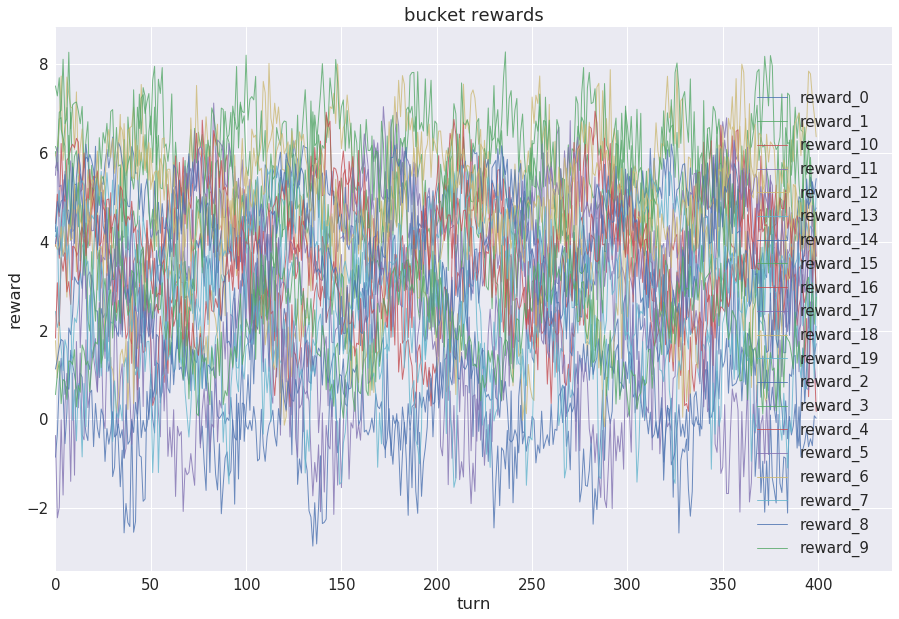

In [8]:
#plot bucket rewards versus turn
cols = ['turn'] + [col for col in game_history.columns if ('reward_' in col)]
df = game_history[cols].drop_duplicates()
cols = cols[1:]
fig, ax = plt.subplots(1,1, figsize=(15, 11))
p = ax.set_title('bucket rewards')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward')
p = ax.set_xlim(0, df['turn'].max() + 40)
for col in cols:
    p = ax.plot(df['turn'], df[col], alpha=0.8, linewidth=1, label=col)
p = ax.legend(loc='lower right')

In [9]:
#play 10 games making random actions, and stash moves in memories queue
N_games = 60
strategy = 'random'
memories = play_N_games(environment, strategy, N_games)
print 'number of memories = ', len(memories)

number of memories =  240000


In [10]:
#build model
N_inputs = state_vector.shape[1]
N_outputs = N_buckets
N_neurons = N_inputs*N_outputs*5
model = build_model(N_inputs, N_neurons, N_outputs)
print model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4000)              164000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 4000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4000)              16004000  
_________________________________________________________________
dropout_2 (Dropout)          (None, 4000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              8002000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 2000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                40020     
Total para

In [11]:
#train model
N_games = 60                               #number of games played during training
gamma = 0.85                                #discount for future rewards
batch_size = 20                             #number of memories used during experience-replay
debug = False                               #set True to see stats about each game's final turn
print 'batch_size = ', batch_size
print 'training model'
trained_model, game, rewards, epsilon = train(environment, model, N_games, gamma, memories, batch_size, debug=debug)
print '\ntraining done'

batch_size =  20
training model
. . . . . . .

KeyboardInterrupt: 

In [ ]:
#plot rewards vs training game
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = game
yp = rewards
p = ax.plot(xp, yp)
p = ax.set_title('reward vs training game')
p = ax.set_xlabel('game')
p = ax.set_ylabel('final reward')

In [ ]:
#plot epsilon vs game_number
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = game
yp = epsilon
p = ax.plot(xp, yp)
p = ax.set_title('epsilon vs game number')
p = ax.set_xlabel('game number')
p = ax.set_ylabel('epsilon')

In [ ]:
#play one smart game
strategy = 'smart'
memories = play_one_game(environment, turn, strategy, model=trained_model)
game_history = memories2timeseries(memories, environment)
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = game_history['turn']
yp = game_history['reward']
p = ax.plot(xp, yp)
p = ax.set_title('reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward')
game_history.head()

In [ ]:
#show grayscale of agent locations
cols = [col for col in game_history.columns if ('agents_' in col)]
df = game_history[cols].T
fig, ax = plt.subplots(1,1, figsize=(15, 6))
plt.imshow(df, aspect='auto', cmap='gray')
df.head()

In [ ]:
#plot bucket rewards versus turn
cols = ['turn'] + [col for col in game_history.columns if ('reward_' in col)]
df = game_history[cols].drop_duplicates()
cols = cols[1:]
fig, ax = plt.subplots(1,1, figsize=(15, 6))
p = ax.set_title('bucket rewards')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward')
p = ax.set_xlim(0, df['turn'].max() + 40)
for col in cols:
    p = ax.plot(df['turn'], df[col], alpha=0.8, linewidth=1, label=col)
p = ax.legend(loc='lower right')

In [ ]:
#done!
time_stop = time.time()
print 'execution time (minutes) = ', (time_stop - time_start)/60.0